# Linear Regression

* y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. 한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀, 둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다. [참고: 위키피디아](https://ko.wikipedia.org/wiki/선형_회귀)

$$y_{\textrm{pred}} = \boldsymbol{W}^{\top}\boldsymbol{x} + b$$

* $\boldsymbol{x} = [x_{1}, x_{2}, \cdots, x_{d}]$
* $\boldsymbol{W} = [w_{1}, w_{2}, \cdots, w_{d}]$
* Loss function: $\mathcal{L} = \sum^{N} (y_{\textrm{pred}} - y)^{2}$

## Training Pseudo Code

```python
for epoch in max_epochs: # 1 epoch: 모든 데이터(N)를 한번 학습 시켰을 때
  for step in num_batches: # num_batches = int(data_size / batch_size)
    1. sampling mini-batches with batch_size
      1-1. data augmentation (필요하면)
    2. calculate logits
    3. calculate loss using logits and labels
    4. calculate the gradient with respect to weights
    5. update weights
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

tf.set_random_seed(219)
np.random.seed(219)

## Phase 1. Build a model

### Make data

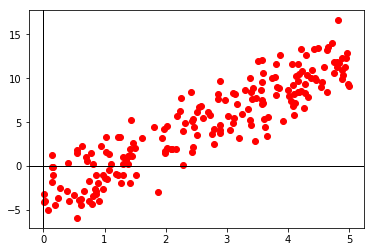

In [2]:
_a = 3
_b = -3
N = 200
data_x = np.random.uniform(low=0, high=5, size=N)
data_y = _a * data_x + _b + np.random.normal(0, 2, N)

plt.plot(data_x, data_y, 'ro')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.show()

### Create placeholders for inputs and labels

In [3]:
# 여기를 직접 채워넣으시면 됩니다.
# x: inputs
x = tf.placeholder(tf.float32, name='x', shape=[])

In [4]:
# 여기를 직접 채워넣으시면 됩니다.
# y: labels
y = tf.placeholder(tf.float32, name='y', shape=[])

### Create weight and bias

In [5]:
# create Variables
# 여기를 직접 채워넣으시면 됩니다.
W = tf.get_variable(name='weight', initializer=tf.constant(0.0))

In [6]:
# 여기를 직접 채워넣으시면 됩니다.
b = tf.get_variable(name='bias', shape=[],
                    initializer=tf.random_normal_initializer())

### Build a model: $y = Wx + b$

In [7]:
# 여기를 직접 채워넣으시면 됩니다.
with tf.variable_scope(name_or_scope='y_pred'):
  y_pred = W * x + b

### Define loss function

In [8]:
# 여기를 직접 채워넣으시면 됩니다.
loss = tf.square(y - y_pred, name='loss')

### Create a optimizer

In [9]:
# 여기를 직접 채워넣으시면 됩니다.
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

## Phase 2. Train a model

### Train a model

* online learning: `batch_size=1`

In [12]:
with tf.Session(config=sess_config) as sess:
  # Initialize all variables
  sess.run(tf.global_variables_initializer())
  
  writer = tf.summary.FileWriter('graphs/01_linear_reg', sess.graph)
  writer.close()
  
  # train the model
  max_epochs = 100
  total_losses = []
  for epoch in range(max_epochs+1):
    total_loss = 0.0

    # 모든 데이터를 random하게 섞는다.
    shuffle_index = np.random.permutation(len(data_x))
    for i in shuffle_index:
      x_ = data_x[i]
      y_ = data_y[i]
      # `sess.run` 부분을 직접 채워넣으시면 됩니다.
      _, loss_ = sess.run([train_op, loss],
                          feed_dict={x: x_, y: y_})
      total_loss += loss_
      
    total_loss /= len(data_x)
    total_losses.append(total_loss)
    
    if epoch % 10 == 0:
      print('Epoch {}: total_loss: {}'.format(epoch, total_loss))
      
  print('training done!')
      
  W_, b_ = sess.run([W, b])

Epoch 0: total_loss: 13.423661719723604
Epoch 10: total_loss: 5.214009806459435
Epoch 20: total_loss: 4.686161262381356
Epoch 30: total_loss: 4.505220465811943
Epoch 40: total_loss: 4.536056428233278
Epoch 50: total_loss: 4.532309321957291
Epoch 60: total_loss: 4.5338244299882895
Epoch 70: total_loss: 4.538899704783107
Epoch 80: total_loss: 4.535370330456353
Epoch 90: total_loss: 4.547076086905872
Epoch 100: total_loss: 4.524043094004756
training done!


### Print the results: W and b

* 정답 W = 3, b = -3

In [13]:
print(W_, b_)

3.170623 -3.3523366


### Plot the loss funtion

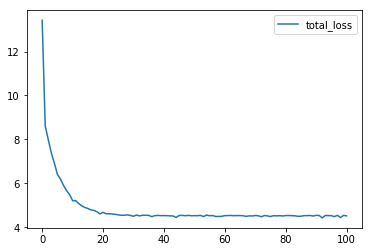

In [14]:
plt.plot(total_losses, label='total_loss')
plt.legend()
plt.show()

### Plot the results

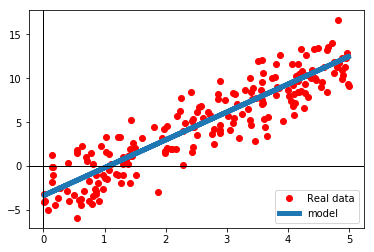

In [15]:
plt.plot(data_x, data_y, 'ro', label='Real data')
plt.plot(data_x, W_ * data_x + b_, lw=5, label='model')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.legend()
plt.show()